In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler                          


64 features, where each of the 64 features is the brightness of one pixel in an 8*8 image , we want to use k-means to try to identify similar digits without using the original label information

In [ ]:
from sklearn.datasets import load_digits                       
digits= load_digits()
digits.data.shape

(1797, 64)

پیش پردازش

نرمال سازی

In [26]:
scaler=MinMaxScaler()
scaler_feature= scaler.fit_transform(digits.data)

ساخت مدل kmean

n_clusters= تعداد خوشه ها

n_init= تعداد دفعاتی که ما به مراکز خوشه هامون تو الگوریتم کیمین مقدار دهی میکنیم که دچار پاسخ بهینه محلی نشیم رو تعیین میکنه

max_iter= ماکسیموم تعداد تکرار های رو که به ازای هر مقدار دهی توی مراکز خوشه تعیین میکنه

بقیه پارامتر ها در داخل سایت سایکیت لرن بخش کیمینز

In [ ]:
kMeans=KMeans(n_clusters=10,random_state=0)             
clusters=kMeans.fit_predict(scaler_feature)             
kMeans.cluster_centers_.shape                              

(10, 64)

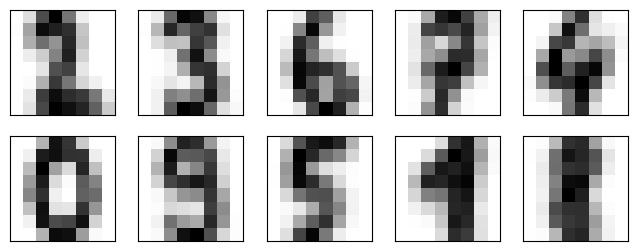

In [ ]:
fig, ax=plt.subplots(2,5,figsize=(8,3))
centers=kMeans.cluster_centers_.reshape(10,8,8)                  
for axi,center in zip(ax.flat , centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,cmap= plt.cm.binary)                          

In [ ]:
labels= np.zeros_like(clusters)                 
from scipy.stats import mode                    
for i in range(10):
    mask=(clusters==i)                                      
    labels[mask]=mode(digits.target[mask])[0]                         

محاسبه accuracy

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7946577629382304

نمایش confusion_matrix

Text(50.722222222222214, 0.5, 'predicted labels')

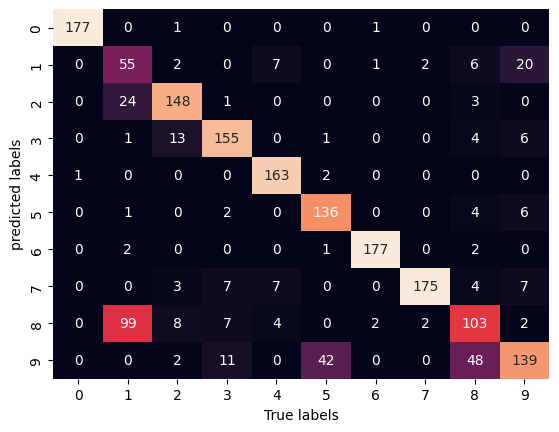

In [ ]:
from sklearn.metrics import confusion_matrix
mat= confusion_matrix(digits.target,labels)                     
sns.heatmap(mat.T, fmt="d",cbar=False, annot=True, xticklabels=digits.target_names,yticklabels=digits.target_names)      
                                    
plt.xlabel("True labels")
plt.ylabel("predicted labels")

توی 8 و توی 1 ارور زیادی داریم

بهبود دادن الگوریتم

پیش پردازش داده میتونه راه حل باشه 


کاهش ابعاد داده هامون

In [ ]:
from sklearn.manifold import TSNE                          


tnse=TSNE(n_components=2, init="random",random_state=0,learning_rate=200)   
                                                                                                                
                                                                                    



digits_proj=tnse.fit_transform(scaler_feature)


kMeans=KMeans(n_clusters=10,random_state=0)
clusters=kMeans.fit_predict(digits_proj)


for i in range(10):
    mask=(clusters==i)                                      
    labels[mask]=mode(digits.target[mask])[0]  


accuracy_score(digits.target, labels)

0.9454646633277685

با کاهش بعد تونستیم معیار صحت رو به 94 درصد برسونیم

رسم مجدد confusion_matrix

Text(50.722222222222214, 0.5, 'predicted labels')

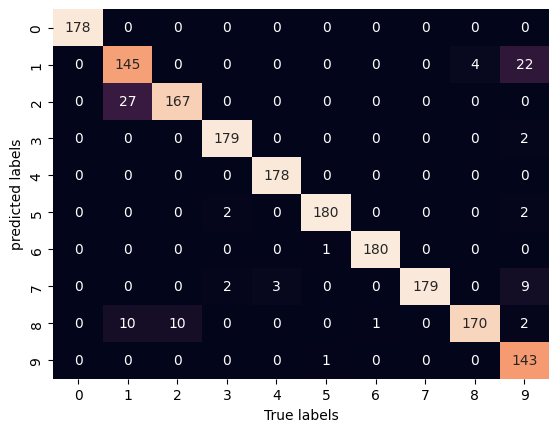

In [41]:
mat= confusion_matrix(digits.target,labels)                     
sns.heatmap(mat.T, fmt="d",cbar=False, annot=True, xticklabels=digits.target_names,yticklabels=digits.target_names)
plt.xlabel("True labels")
plt.ylabel("predicted labels")

نسبت به حالت قبلی اشتباهات در عدد 8 و 1 بهبود یافته

استفاده از الگوریتمه البو (آرنج)

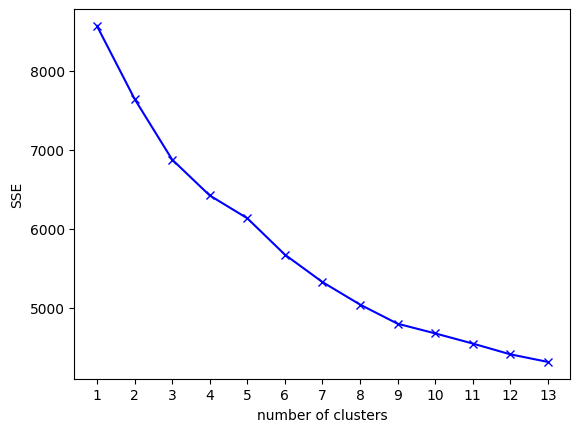

In [ ]:
sse_scaled=[]
max_k=14
for k in range(1,max_k):
    kMeans=KMeans(n_clusters=k,random_state=42)
    kMeans.fit(scaler_feature)
    sse_scaled.append(kMeans.inertia_)                 
plt.plot(range(1,max_k),sse_scaled,"bx-")                            
plt.xticks(range(1,max_k))
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()

در اینجا شکل ارنج به خوبی شکل نگرفته پس نمیشه تشخیص داد 
پس میریم سراغ ی الگوریتم دیگه

 این معیار زمانی خوب جواب میده که شکلمون محدب باشه و زمانی که نامظمه ممکنه خوب جواب نده

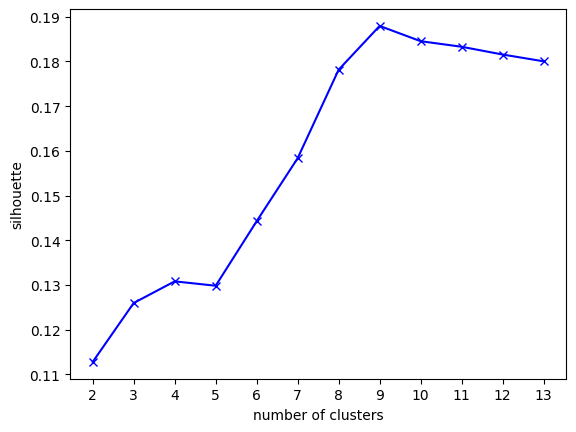

In [ ]:
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,max_k):                             
    kMeans=KMeans(n_clusters=k,random_state=42)
    kMeans.fit(scaler_feature)
    score=silhouette_score(scaler_feature,kMeans.labels_)
    scores.append(score)
    
plt.plot(range(2,max_k),scores,"bx-")
plt.xticks(range(2,max_k))
plt.xlabel("number of clusters")
plt.ylabel("silhouette")
plt.show()